In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [2]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2020-12-07 04:56:55--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.177.133, 172.67.193.2, 104.27.176.133, ...
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-07 04:56:56--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip.1’

flowers-new.zip.1       [          <=>       ]   5.74M  2.10MB/s    in 2.7s    

2020-12-07 04:57:00 (2.10 MB/s) - ‘drive/app/flowers-new.zip.1’ saved [6021364]

replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace flowers/daisy/11642632_1e7627a2cc.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace flow

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/gdrive/MyDrive/Flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/gdrive/MyDrive/Flowers/sunflower'
FLOWER_TULIP_DIR='/content/gdrive/MyDrive/Flowers/tulip'
FLOWER_DANDI_DIR='/content/gdrive/MyDrive/Flowers/dandelion'
FLOWER_ROSE_DIR='/content/gdrive/MyDrive/Flowers/rose'

In [8]:
def assign_label(img,flower_type):
    return flower_type

In [9]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [10]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 260/260 [00:37<00:00,  6.89it/s]

260


In [11]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 260/260 [00:36<00:00,  7.12it/s]

520


In [12]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 260/260 [00:37<00:00,  7.01it/s]

780


In [13]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 260/260 [00:36<00:00,  7.18it/s]

1040


In [14]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 260/260 [00:38<00:00,  6.76it/s]

1300


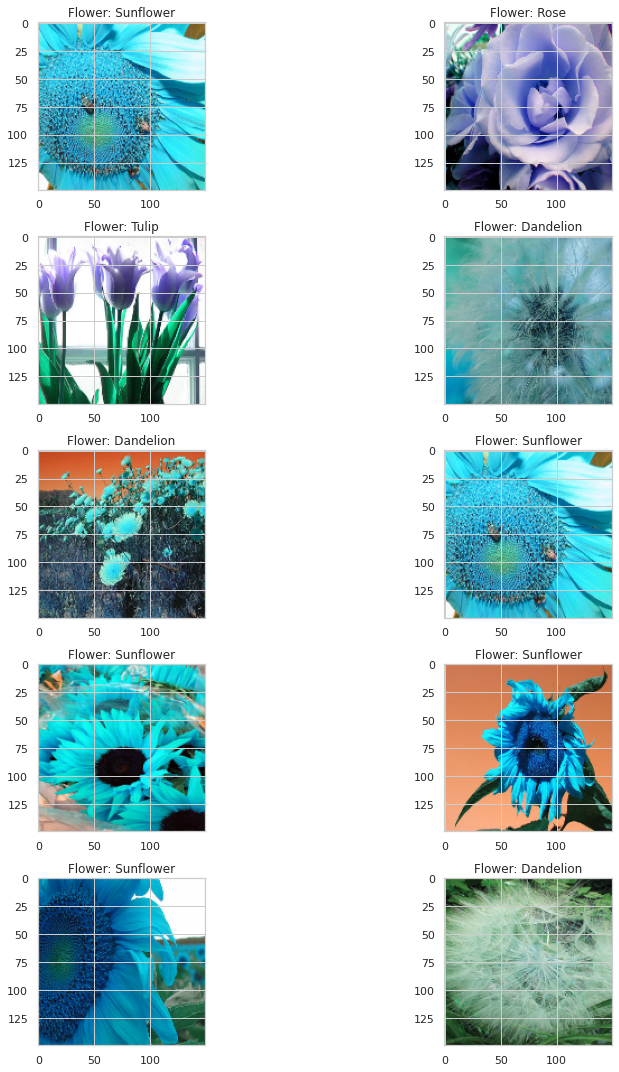

In [15]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [16]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [17]:
X.shape

(1300, 150, 150, 3)

In [18]:
Y.shape

(1300, 5)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [21]:
y_test.shape

(325, 5)

In [22]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [23]:
#using a LR Annealer
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [25]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [27]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
8/8 [==============================] - 51s 6s/step - loss: 1.7015 - accuracy: 0.2574 - val_loss: 1.5141 - val_accuracy: 0.3477
Epoch 2/50
8/8 [==============================] - 49s 6s/step - loss: 1.3725 - accuracy: 0.4236 - val_loss: 1.0712 - val_accuracy: 0.6400
Epoch 3/50
8/8 [==============================] - 50s 6s/step - loss: 1.0943 - accuracy: 0.5415 - val_loss: 1.0975 - val_accuracy: 0.5323
Epoch 4/50
8/8 [==============================] - 49s 6s/step - loss: 0.9743 - accuracy: 0.5959 - val_loss: 0.8881 - val_accuracy: 0.6585
Epoch 5/50
8/8 [==============================] - 48s 6s/step - loss: 0.8379 - accuracy: 0.6636 - val_loss: 0.7288 - val_accuracy: 0.7015
Epoch 6/50
8/8 [==============================] - 49s 6s/step - loss: 0.7260 - accuracy: 0.7046 - val_loss: 0.6263 - val_accuracy: 0.7600
Epoch 7/50
8/8 [==============================] - 50s 6s/step - loss: 0.6905 - accuracy: 0.7200 

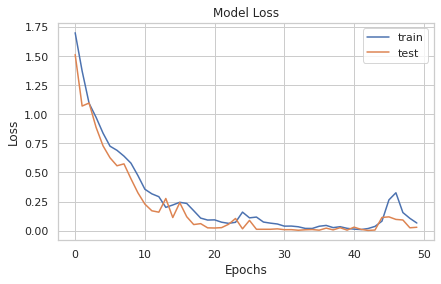

In [30]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

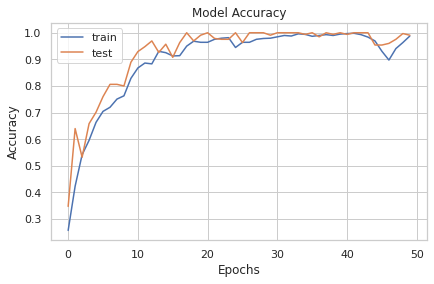

In [29]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [31]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis = 1)

In [36]:
y_test_ = to_categorical(y_test)

In [37]:
predictions = to_categorical(predictions,5)

In [38]:
a = np.argmax(predictions, axis=1 )

In [39]:
b = np.argmax(y_test ,axis=1)

In [40]:
cm = confusion_matrix(a,b)
cm

array([[68,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0],
       [ 0,  0, 63,  0,  3],
       [ 0,  0,  0, 71,  0],
       [ 0,  0,  0,  0, 65]])

In [41]:
accuracy = sum(cm[i][i] for i in range(5)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9907692307692307


Screenshot of accuracy

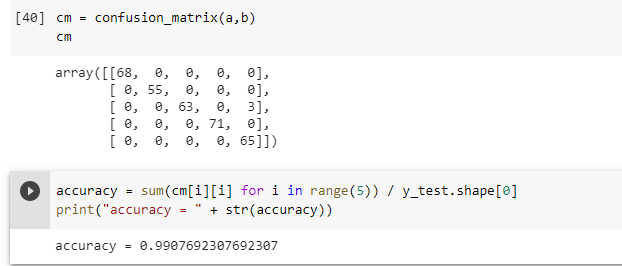

In [42]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(y_test, predictions, average="macro"))
print('recall score - ', recall_score(y_test, predictions, average="macro"))

precision score -  0.990909090909091
recall score -  0.9911764705882353


In [43]:
model.save('final_flowers_model2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_flowers_model2/assets


In [44]:
from tensorflow import keras
model = keras.models.load_model('final_flowers_model2')